In [1]:
import pandas as pd

# Applying Linear Regression Model

In [2]:
data1 = pd.read_csv("winequality-white.csv")
data1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data1['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [5]:
data1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [6]:
data1['quality'].value_counts()
data1=data1.drop('citric acid', axis=1)
data1=data1.drop('fixed acidity', axis=1)
data1=data1.drop('free sulfur dioxide', axis=1)
data1=data1.drop('total sulfur dioxide', axis=1)
data1=data1.drop('sulphates', axis=1)


In [7]:
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = data1.drop('quality', axis=1)
y = data1['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature 0: 149.503105
Feature 1: 31.518646
Feature 2: 130.762945
Feature 3: 339.708700
Feature 4: 40.789331
Feature 5: 792.936165


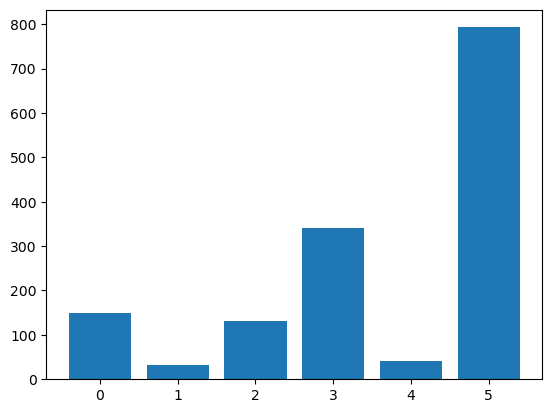

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [9]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_fs,y_train)
lin_reg_pred = lin_reg.predict(X_test_fs)

mse_lin_reg = mean_squared_error(y_test, lin_reg_pred)
r2_lin_reg = r2_score(y_test, lin_reg_pred)
mae = mean_absolute_error(y_test, lin_reg_pred)

In [11]:
print('Linear Regression Mean Squared Error: ',mse_lin_reg)
print('Linear Regression R^2 Score:',r2_lin_reg)

Linear Regression Mean Squared Error:  0.5549847314827815
Linear Regression R^2 Score: 0.2649521980270638


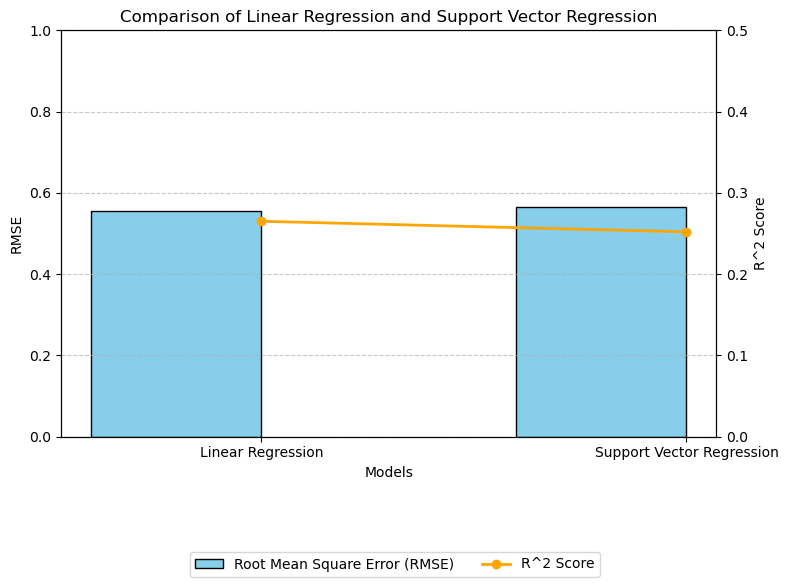

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Linear Regression', 'Support Vector Regression']
rmse = [0.555, 0.565]
r2_scores = [0.265, 0.252]

x = np.arange(len(models))

# Plot configuration
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for RMSE
ax1.bar(x - 0.2, rmse, width=0.4, label='Root Mean Square Error (RMSE)', color='skyblue', edgecolor='black')
ax1.set_ylabel('RMSE', color='black')
ax1.set_ylim(0, 1)

# Line plot for R^2 Score
ax2 = ax1.twinx()
ax2.plot(x, r2_scores, label='R^2 Score', marker='o', color='orange', linewidth=2)
ax2.set_ylabel('R^2 Score', color='black')
ax2.set_ylim(0, 0.5)

# X-axis and title
plt.xticks(x, models)
ax1.set_xlabel('Models')
plt.title('Comparison of Linear Regression and Support Vector Regression')

# Legend and grid
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
